# Data Cleaning and Augmentation

The LDA Topic Modeling part is adapted from https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/topic_modeling_Gensim.ipynb

## Data Cleaning

As we discussed in the slides, we will start with data preprocessing which is sometimes also called data cleaning. Depending on the type of data you have, you might have different workflows for data cleaning. But we will assume that at this step our data is available in a rectangular format which can loaded using dataframes. And we will primarily clean text data. What is meant by data cleaning?

- remove social media specific language
- remove stopwords
- tokenization

One can also include dropping or imputing missing values a part of data cleaning but we will not cover that here.

In [1]:
import pandas as pd

C:\Users\isen1\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# df = pd.read_csv('all_comments_sample_CT_sample.csv')
df = pd.read_csv('data/all_politicians_comments/all_comments_sample_137K.csv')
len(df)

137555

In [3]:
df.head()

,id,body,subreddit,to_type,NEL,Names,created_utc,sex,ethnicity,origin,...,nickname_used,Adjectives,Verbs,Nouns,Descriptors_parsed,Verbs_parsed,Relation,Valence,Arousal,Dominance
0,e2r5x8o,"Paul Joseph Watson, Count Dankula and more ha...",The_Donald,t1,Q291169,['Jeremy Corbyn'],NaN,male,NaN,United Kingdom,...,False,"['more', 'parliamentary', 'small', 'effective'...","['have', 'be', 'have', 'be', 'take', 'get', 'g...","['system', 'party', 'system', 'seat', 'winner'...",[],[],['nmod'],0.570419,0.425279,0.563581
1,e2r5x9y,Just wait til [NAME] releases [NAME] tapes! .....,politics,t1,Q7747,['Putin'],NaN,male,Russians,Russia,...,False,[],['wait'],"['name', 'release', 'name', 'tape', 'music', '...",[],[],"['nmod', 'npadvmod']",0.569800,0.381400,0.425200
2,e2r5zwt,"I want Michael Avenatti to live a long time, a...",politics,t1,Q22686,['Donald Trump'],NaN,male,NaN,United States of America,...,False,['long'],"['want', 'live', 'want', 'lose', 'say', 'need'...","['time', 'dignity', 'name', 'name', 'poison', ...",[],['say'],['dep'],0.600769,0.472000,0.527231
3,e2r640r,I think we've established [NAME]'s 'type'...ty...,politics,t3,Q22686,['Trump'],NaN,male,NaN,United States of America,...,False,"['young', 'nubile']","['think', 'establish', 'prefer', 'remind']","['name', ""type'"", 'type', 'chick', 'type']",[],['establish'],['dobj'],0.669714,0.372143,0.507857
4,e2r66h0,There's no way [NAME] or Trump know exactly wh...,politics,t3,Q212648,['Giuliani'],NaN,male,NaN,United States of America,...,False,"['able', 'several', 'treasonous', 'mere', 'rus...","['know', 'record', 'be', 'get', 'expect', 'rel...","['way', 'name', 'trump', 'name', 'trump', 'mag...","['trump', 'able']",['be'],"['parataxis', 'dep']",0.549697,0.484636,0.545667


In [4]:
import spacy
# !python -m spacy download en
# spacy.load('en')
from spacy.lang.en import English
parser = English()

def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.orth_.startswith('@'):
            lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

Let's try an example of tokenization with the function we just defined.

In [5]:
text_example = df['body'][0]
text_example

' Paul Joseph Watson, Count Dankula and more have a Parliamentary system, so smaller parties can be more effective No, because while we have a parliamentary system, seats are winner-takes all, on a a first-past-the-post basis. There is no PR.UKIP got 30% of the vote one time and got 0/650 seats to show for it.If that 30% of the popuar vote had gone to the conservatives instead, the conservatives would have won a number of marginal seats and had a majority right now.UKIp splitting the tory vote, with the polls so close, and a majority so slim, would be a great way for a [NAME] government to happen.And that would be the end of Britain.'

In [6]:
tokenize(text_example)

['paul',
 'joseph',
 'watson',
 ',',
 'count',
 'dankula',
 'and',
 'more',
 'have',
 'a',
 'parliamentary',
 'system',
 ',',
 'so',
 'smaller',
 'parties',
 'can',
 'be',
 'more',
 'effective',
 'no',
 ',',
 'because',
 'while',
 'we',
 'have',
 'a',
 'parliamentary',
 'system',
 ',',
 'seats',
 'are',
 'winner',
 '-',
 'takes',
 'all',
 ',',
 'on',
 'a',
 'a',
 'first',
 '-',
 'past',
 '-',
 'the',
 '-',
 'post',
 'basis',
 '.',
 'there',
 'is',
 'no',
 'pr.ukip',
 'got',
 '30',
 '%',
 'of',
 'the',
 'vote',
 'one',
 'time',
 'and',
 'got',
 '0/650',
 'seats',
 'to',
 'show',
 'for',
 'it',
 '.',
 'if',
 'that',
 '30',
 '%',
 'of',
 'the',
 'popuar',
 'vote',
 'had',
 'gone',
 'to',
 'the',
 'conservatives',
 'instead',
 ',',
 'the',
 'conservatives',
 'would',
 'have',
 'won',
 'a',
 'number',
 'of',
 'marginal',
 'seats',
 'and',
 'had',
 'a',
 'majority',
 'right',
 'now',
 '.',
 'ukip',
 'splitting',
 'the',
 'tory',
 'vote',
 ',',
 'with',
 'the',
 'polls',
 'so',
 'close',
 ','

In [7]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\isen1\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
from nltk.corpus import wordnet as wn
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
from nltk.stem.wordnet import WordNetLemmatizer
def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

In [9]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\isen1\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [10]:
for w in ['dogs', 'ran', 'discouraged']:
    print(w, get_lemma(w), get_lemma2(w))

dogs dog dog
ran run ran
discouraged discourage discouraged


In [11]:
for word in tokenize(text_example):
    print(word, get_lemma(word))

paul paul
joseph joseph
watson watson
, ,
count count
dankula dankula
and and
more more
have have
a a
parliamentary parliamentary
system system
, ,
so so
smaller smaller
parties party
can can
be be
more more
effective effective
no no
, ,
because because
while while
we we
have have
a a
parliamentary parliamentary
system system
, ,
seats seats
are are
winner winner
- -
takes take
all all
, ,
on on
a a
a a
first first
- -
past past
- -
the the
- -
post post
basis basis
. .
there there
is be
no no
pr.ukip pr.ukip
got get
30 30
% %
of of
the the
vote vote
one one
time time
and and
got get
0/650 0/650
seats seats
to to
show show
for for
it it
. .
if if
that that
30 30
% %
of of
the the
popuar popuar
vote vote
had have
gone go
to to
the the
conservatives conservative
instead instead
, ,
the the
conservatives conservative
would would
have have
won won
a a
number number
of of
marginal marginal
seats seats
and and
had have
a a
majority majority
right right
now now
. .
ukip ukip
splitting split
t

In [12]:
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\isen1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
def get_tokens(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 4]
    tokens = [token for token in tokens if token not in en_stop]
    tokens = [get_lemma(token) for token in tokens]
    return tokens

In [14]:
get_tokens(text_example)

['joseph',
 'watson',
 'count',
 'dankula',
 'parliamentary',
 'system',
 'smaller',
 'party',
 'effective',
 'parliamentary',
 'system',
 'seats',
 'winner',
 'take',
 'first',
 'basis',
 'pr.ukip',
 '0/650',
 'seats',
 'popuar',
 'conservative',
 'instead',
 'conservative',
 'would',
 'number',
 'marginal',
 'seats',
 'majority',
 'right',
 'split',
 'polls',
 'close',
 'majority',
 'would',
 'great',
 'government',
 'happen',
 'would',
 'britain']

choice of package can affect the analysis: something to keep in mind when reading and writing the papers

- where small issues and discrepencies can happen
- sentiment analysis has many intemediate steps that can affect the final estimate

## Data Augmentation

Now that we have cleaned thedata, we can move on to enriching it. We will cover the following data enrichment processes:
- **supervised**: sentiment analysis
- **unsupervised**: topic modeling 

### Sentiment Analysis

There are several options for sentiment analysis. Today we will use **VADER** sentiment: https://github.com/cjhutto/vaderSentiment which stands for Valence Aware Dictionary and sEntiment Reasoner. It is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. 

In [15]:
import nltk # VADER is a part of the popular NLP toolkit called nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\isen1\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [16]:
data_subset = df.sample(10000)

In [17]:
data_subset['Sentiment'] = [sid.polarity_scores(i) for i in data_subset['body']]
data_subset['Sentiment'] = [sid.polarity_scores(i)['compound'] for i in data_subset['body']]
data_subset.head()

,id,body,subreddit,to_type,NEL,Names,created_utc,sex,ethnicity,origin,...,Adjectives,Verbs,Nouns,Descriptors_parsed,Verbs_parsed,Relation,Valence,Arousal,Dominance,Sentiment
90254,etpyazn,The source article from Harvard is far better ...,Republican,t3,Q22686,['Trump'],NaN,male,NaN,United States of America,...,"['well', 'biased', 'long', 'well', 'fascinatin...","['agree', 'start', 'do', 'do', 'focus', 'focus...","['source', 'article', 'summary', 'student', 'p...",[],['key'],['dobj'],0.161857,0.121404,0.152587,0.9517
42156,ec8bcbd,Exactly. Rosenstein had all kinds of conflict...,The_Donald,t1,Q715156,['Mueller'],NaN,male,NaN,United States of America,...,['legit'],"['have', 'recommend', 'justify', 'appoint', 'a...","['kind', 'conflict', 'interest', 'course', 'ac...",[],['appoint'],['dobj'],0.723167,0.565000,0.649333,0.4019
100465,exl5ppc,[NAME] is a former Jew. URL,The_Donald,t3,Q366532,['Wayne Allyn Root'],NaN,male,NaN,United States of America,...,['former'],[],['name'],[],['be'],['dep'],0.057300,0.030000,0.041500,0.0000
115715,f42u71b,"There would be none. They danced and played ""d...",Conservative,t1,Q7416,['Thatcher'],NaN,female,White British,United Kingdom,...,"['dead', 'big', 'weak']","['be', 'dance', 'play', 'de', 'die', 'make', '...","['none', 'dong', 'witch', 'name', 'person', 'p...",['when'],['die'],['dep'],0.126053,0.118921,0.113079,-0.8074
26129,e8h1z1l,"Good man, God bless President [NAME]",politics,t3,Q22686,['Trump!'],NaN,male,NaN,United States of America,...,['good'],['bless'],"['man', 'name']",[],[],['appos'],0.760500,0.417333,0.693833,0.7783


In [18]:
import matplotlib.pyplot as plt

In [19]:
data_subset.subreddit.value_counts()

subreddit
politics           7064
The_Donald         1240
news                406
neoliberal          234
canada              189
Libertarian         167
Conservative        135
unitedkingdom       135
europe              100
australia            90
india                55
teenagers            41
democrats            37
ireland              33
newzealand           23
socialism            11
Republican           11
TwoXChromosomes       9
MensRights            8
uspolitics            6
Liberal               5
SocialDemocracy       1
Name: count, dtype: int64

<Axes: xlabel='subreddit'>

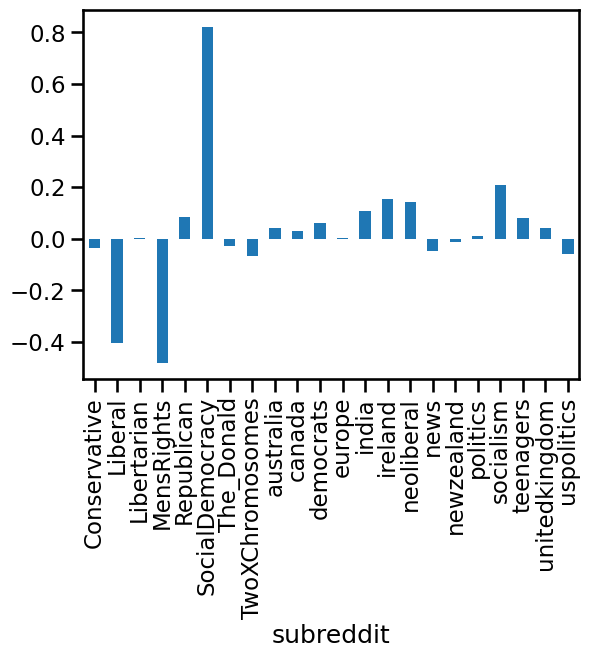

In [20]:
import seaborn as sns
sns.set_context('talk')
data_subset.groupby('subreddit')['Sentiment'].mean().plot(kind = 'bar')

### ✍️Try yourself: 
1. Do this once more on a different subset of the data, i.e., rerun from 'data_subset = df.sample(10000)' and see if the results change
2. What's the association between the Valence column and VADER sentiment?

### Few-shot sentiment classification

There are many other ways in which you can do sentiment analysis, or supervised tasks where you already know the list of categories you want to classify your text into. 

Other resources:
- Check [this tutorial](https://github.com/anasan00/sds_komex/tree/main/tutorials/day3) on text-as-data approaches for more ideas.
- Prompt-based labeling with language models: https://colab.research.google.com/drive/1QIG-3bIo1BHVWWlS22-1XItlZRrGSMNe?usp=sharing

One very cheap* approach for any type of supervised task is using natural language inference for classification.

*not computationally cheap, per se, but you don't need to train your own model for this.

In [21]:
### zero-shot NLI classification
from transformers import pipeline

classifier = pipeline("zero-shot-classification",model='facebook/bart-large-mnli')

In [22]:
data_subset['body'].values[7]

"And [NAME] probably could have won some of the more family values based states like Utah and Idaho if [NAME] hadn't made an ass of [NAME] with the Aleppo question."

In [23]:
example = data_subset['body'].values[7]

In [24]:
classifier(example, ['positive', 'negative', 'neutral']) # for sentiment

{'sequence': "And [NAME] probably could have won some of the more family values based states like Utah and Idaho if [NAME] hadn't made an ass of [NAME] with the Aleppo question.",
 'labels': ['negative', 'positive', 'neutral'],
 'scores': [0.9071447849273682, 0.059307318180799484, 0.033547885715961456]}

### ✍️Try yourself: How does this approach compare with VADER?

## Topic Modeling

The last demo for data enriching is topic modeling where we use the LDA algorithm to find latent topics in our data.

In [25]:
import random
text_data = []
for line in data_subset['body']:
    tokens = get_tokens(line)
    if random.random() > .99:
        print(line)
        print(tokens)
        text_data.append(tokens)

I was in college in the [NAME] years too.  Had a humanities prof who had something negative to say about [NAME] every single day.  Either that or talking about how Howard Dean was going to be the next PotUS.
['college', 'years', 'humanities', 'something', 'negative', 'every', 'single', 'either', 'talking', 'howard', 'going', 'potus']
Which [NAME] didn't do. Calm down.
[]
If and when Barr gives up the report [NAME] will crucify Barr on the twitter.
['give', 'report', 'crucify', 'twitter']
Let[NAME] see if [NAME] have collectively learned the lessons of 2016.
['let[name', 'collectively', 'learn', 'lesson']
Kavanaugh didn’t. Women were far more likely to be in favor of Kavanaugh’s nomination than Women were to be in favor of Trump’s election as a result.  #MeToo was a legitimate movement, a catalyst for change until democrats bastardized MeToo into a political weapon and used MeToo to shoot democrats in the foot.  Good luck with that #BlueRipple. Republicans looked certain to lose the Hou

In [26]:
from gensim import corpora
dictionary = corpora.Dictionary(text_data)

In [27]:
corpus = [dictionary.doc2bow(text) for text in text_data]

In [28]:
import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

In [29]:
import gensim
NUM_TOPICS = 5
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model5.gensim')

In [30]:
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)


(0, '0.018*"trump" + 0.010*"tulsi" + 0.009*"would" + 0.009*"try"')
(1, '0.017*"party" + 0.011*"people" + 0.009*"would" + 0.008*"could"')
(2, '0.010*"mayor" + 0.008*"think" + 0.008*"would" + 0.008*"mcconnell"')
(3, '0.018*"trump" + 0.017*"people" + 0.009*"think" + 0.009*"would"')
(4, '0.013*"democrat" + 0.012*"american" + 0.011*"trump" + 0.010*"republican"')


In [31]:
new_doc = 'Trump is corrupt'
new_doc = get_tokens(new_doc)
new_doc_bow = dictionary.doc2bow(new_doc)
print(new_doc_bow)
print(ldamodel.get_document_topics(new_doc_bow))

[(57, 1), (1259, 1)]
[(0, 0.73099244), (1, 0.067071535), (2, 0.06692692), (3, 0.067744195), (4, 0.06726497)]


In [32]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 3, id2word=dictionary, passes=15)
ldamodel.save('model3.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.014*"would" + 0.013*"trump" + 0.008*"party" + 0.008*"people"')
(1, '0.015*"people" + 0.014*"trump" + 0.006*"would" + 0.006*"support"')
(2, '0.011*"trump" + 0.010*"think" + 0.008*"kavanaugh" + 0.008*"democrat"')


In [33]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 10, id2word=dictionary, passes=15)
ldamodel.save('model10.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.023*"democrat" + 0.019*"could" + 0.011*"reach" + 0.009*"friend"')
(1, '0.019*"geotus" + 0.016*"trump" + 0.012*"israel" + 0.012*"netanyahu"')
(2, '0.016*"kavanaugh" + 0.016*"support" + 0.014*"tuesday" + 0.012*"american"')
(3, '0.019*"trump" + 0.015*"tulsi" + 0.013*"gabbard" + 0.013*"reason"')
(4, '0.016*"party" + 0.015*"would" + 0.010*"scindia" + 0.010*"people"')
(5, '0.027*"people" + 0.013*"public" + 0.008*"would" + 0.008*"conservative"')
(6, '0.032*"trump" + 0.012*"going" + 0.012*"president" + 0.009*"think"')
(7, '0.030*"trump" + 0.019*"people" + 0.012*"abortion" + 0.012*"think"')
(8, '0.018*"people" + 0.015*"crowd" + 0.011*"billionaire" + 0.011*"name]s"')
(9, '0.018*"would" + 0.015*"mayor" + 0.010*"think" + 0.010*"barney"')


There are several other topic modeling techniques:

- LSA
- word-embedding based
- hierarchical techniques

## Visualizing topics

In [34]:
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model5.gensim')

In [35]:
# !pip install pyLDAvis

In [36]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
lda_display = gensimvis.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

In [37]:
lda3 = gensim.models.ldamodel.LdaModel.load('model3.gensim')
lda_display3 = gensimvis.prepare(lda3, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display3)

Topic modeling is quite versatile and can be used to uncover many different themes in the data (it can sometimes also be used for exploratory data analysis). Here are some more resources for topic modeling:

- nice general intro: https://maria-antoniak.github.io/2022/07/27/topic-modeling-for-the-people.html
- MALLET: http://programminghistorian.org/en/lessons/topic-modeling-and-mallet
- BERTopic: https://maartengr.github.io/BERTopic/index.html
- contextualized topic modeling: https://github.com/MilaNLProc/contextualized-topic-models

### ✍️Try yourself: How do the results of BERTopic and LDA compare?